In [1]:
import fargopy as fp
from fargopy import DEG,RAD
import matplotlib.pyplot as plt

# For developing purpose. Remove during production
%load_ext autoreload
%autoreload 2

Running FARGOpy version 0.2.0


## Test visualization

In [2]:
sim = fp.Simulation()
sim.set_output_dir('../../public/outputs/p3diso_f0/')

Now you are connected with output directory '../../public/outputs/p3diso_f0/'


In [4]:
sim.load_properties()

Loading variables
85 variables loaded
Simulation in 3 dimensions
Loading domain in spherical coordinates:
	Variable phi: 128 [[0, -3.117048960983623], [-1, 3.117048960983623]]
	Variable r: 64 [[0, 0.5078125], [-1, 1.4921875]]
	Variable theta: 32 [[0, 1.44319539835739], [-1, 1.5687709152323963]]
Configuration variables and domains load into the object. See e.g. <sim>.vars


In [28]:
gasdens2 = sim.load_field('gasdens',snapshot=2)

In [29]:
gasdens, mesh = gasdens2.meshslice(slice='itheta=-1')

(-1.5013514200612197,
 1.4995451522530097,
 -1.4995451522530097,
 1.4995451522530097)

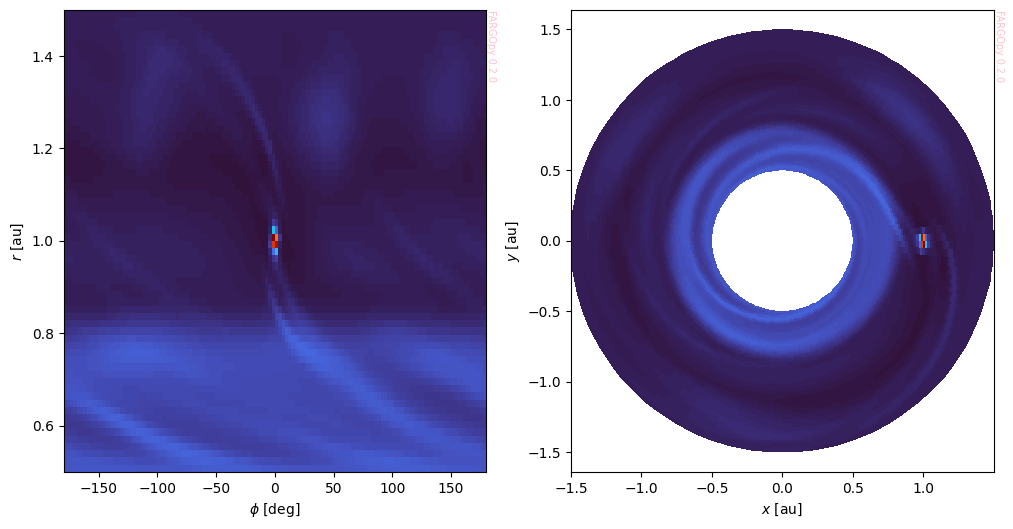

In [31]:
fig,axs = plt.subplots(1,2,figsize=(12,6))

cmap = 'nipy_spectral'
cmap = 'gist_rainbow'
cmap = 'gist_rainbow'
cmap = 'viridis'
cmap = 'turbo'
ax = axs[0]
ax.pcolormesh(mesh.phi*RAD,mesh.r*sim.UL/fp.AU,gasdens,cmap=cmap)
ax.set_xlabel('$\phi$ [deg]')
ax.set_ylabel('$r$ [au]')
fp.Util.fargopy_mark(ax)

ax = axs[1]
ax.pcolormesh(mesh.x*sim.UL/fp.AU,mesh.y*sim.UL/fp.AU,
              gasdens,cmap=cmap)
ax.set_xlabel('$x$ [au]')
ax.set_ylabel('$y$ [au]')
fp.Util.fargopy_mark(ax)
ax.axis('equal')

Let's plot the `theta` component of the velocity:

Text(1, 1, 'FARGOpy 0.2.0')

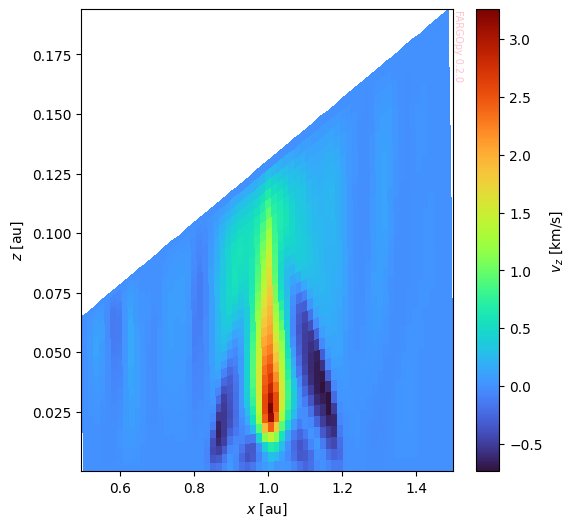

In [16]:
gasvz2 = sim.load_field('gasvz',snapshot=2)
gasvz,mesh = gasvz2.meshslice(slice='phi=0')

fig,axs = plt.subplots(1,1,figsize=(6,6))

cmap = 'turbo'
ax = axs
c = ax.pcolormesh(mesh.x*sim.UL/fp.AU,mesh.z*sim.UL/fp.AU,gasvz*sim.UV/(1e5),cmap=cmap)
cbar = fig.colorbar(c)
cbar.set_label('$v_z$ [km/s]')
ax.set_xlabel('$x$ [au]')
ax.set_ylabel('$z$ [au]')
fp.Util.fargopy_mark(ax)

Now, let's do it in a vectorial way:

In [32]:
gasv = sim.load_field('gasv',snapshot=2,type='vector')
gasv.data.shape, gasv.get_size()

((3, 32, 64, 128), 6.0)

Convert to cartesian:

In [33]:
gasvx, gasvy, gasvz = gasv.to_cartesian()

Slice:

In [34]:
gasvz, mesh = gasvz.meshslice(slice='phi=0')

Text(1, 1, 'FARGOpy 0.2.0')

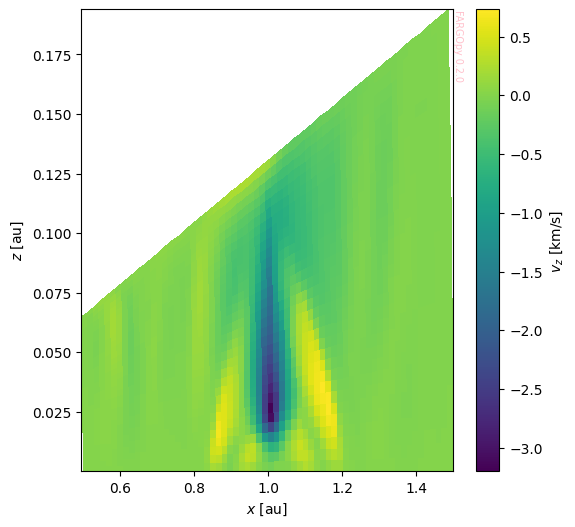

In [35]:
fig,axs = plt.subplots(1,1,figsize=(6,6))

cmap = 'viridis'
ax = axs
c = ax.pcolormesh(mesh.x*sim.UL/fp.AU,mesh.z*sim.UL/fp.AU,gasvz*sim.UV/(1e5),cmap=cmap)
cbar = fig.colorbar(c)
cbar.set_label('$v_z$ [km/s]')
ax.set_xlabel('$x$ [au]')
ax.set_ylabel('$z$ [au]')
fp.Util.fargopy_mark(ax)

In [38]:
gasd = sim.load_field('gasdens',snapshot=2,type='scalar')
gasv = sim.load_field('gasv',snapshot=2,type='vector')
gasvx, gasvy, gasvz = gasv.to_cartesian()

gasd_slice,mesh = gasd.meshslice(slice='phi=0')
gasvx_slice,mesh = gasvx.meshslice(slice='phi=0')
gasvy_slice,mesh = gasvy.meshslice(slice='phi=0')
gasvz_slice,mesh = gasvz.meshslice(slice='phi=0')

In [53]:
import numpy as np

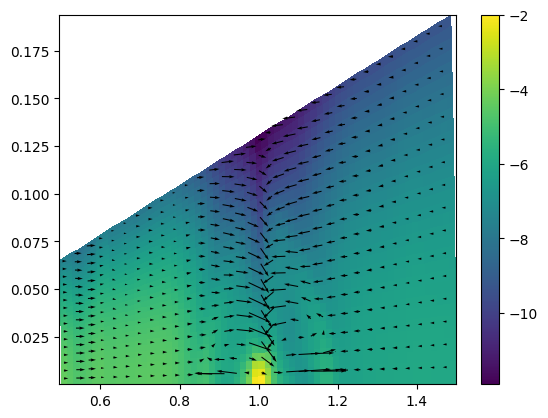

In [54]:
cmap = 'viridis'
plt.pcolormesh(mesh.x,mesh.z,np.log(gasd_slice),cmap=cmap)
plt.colorbar()
freq = 2
plt.quiver(mesh.x[::freq,::freq],
           mesh.z[::freq,::freq],
           gasvx_slice[::freq,::freq],
           gasvz_slice[::freq,::freq],
           scale=2)

In [55]:
abs(sim.domains.r-0.8).argmin(), abs(sim.domains.r-1.2).argmin()

(19, 44)

In [56]:
abs(sim.domains.phi-(-5*DEG)).argmin(), abs(sim.domains.phi-(+5*DEG)).argmin()

(62, 65)

In [64]:
gasd = sim.load_field('gasdens',snapshot=2,type='scalar')
gasv = sim.load_field('gasv',snapshot=2,type='vector')
gasvx, gasvy, gasvz = gasv.to_cartesian()

gasd_slice,mesh = gasd.meshslice(slice="itheta=-1,ir='10:60',iphi='40:80'")
gasvx_slice,mesh = gasvx.meshslice(slice="itheta=-1,ir='10:60',iphi='40:80'")
gasvy_slice,mesh = gasvy.meshslice(slice="itheta=-1,ir='10:60',iphi='40:80'")
gasvz_slice,mesh = gasvz.meshslice(slice="itheta=-1,ir='10:60',iphi='40:80'")

In [65]:
gasd_slice.data.shape

(50, 40)

In [77]:
%matplotlib inline

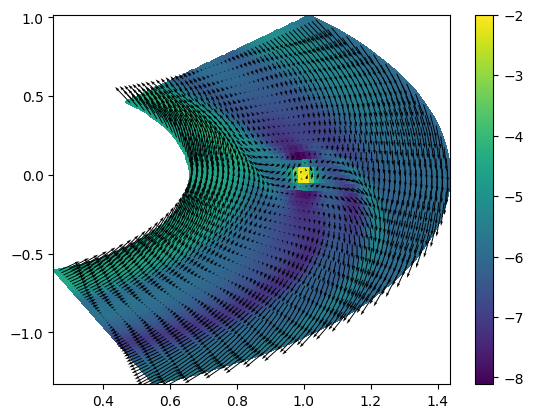

In [78]:
cmap = 'viridis'
plt.pcolormesh(mesh.x,mesh.y,np.log(gasd_slice),cmap=cmap)
plt.colorbar()
freq = 1
plt.quiver(mesh.x[::freq,::freq],
           mesh.y[::freq,::freq],
           gasvx_slice[::freq,::freq],
           gasvy_slice[::freq,::freq],
           scale=10)